### Butterworth filter

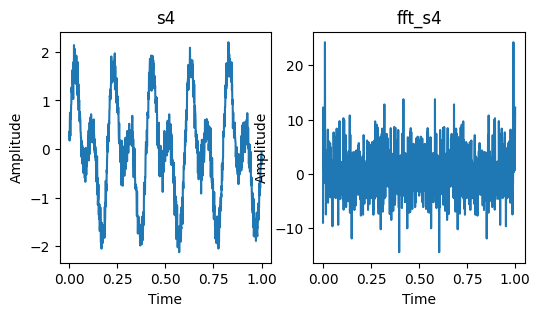

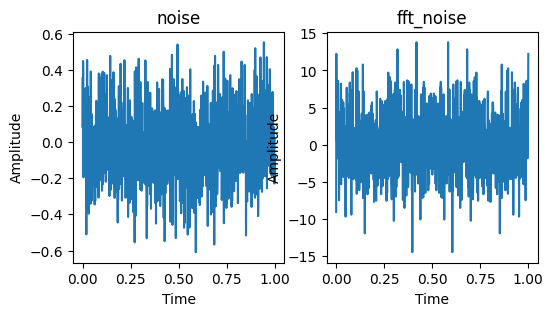

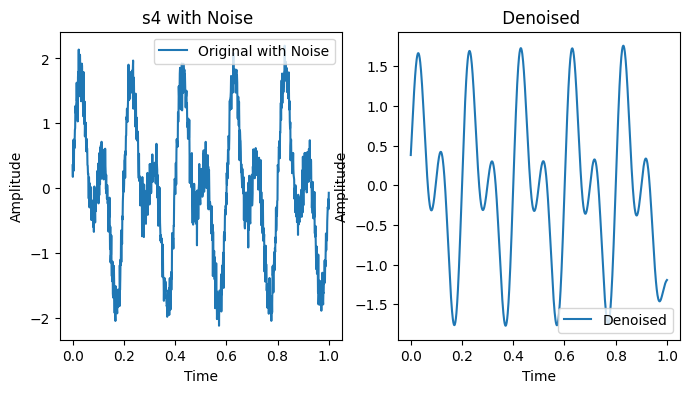

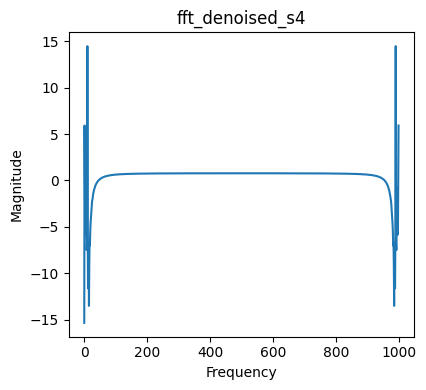

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define the time axis
t = np.linspace(0, 1, 1000)

# Define the frequency and amplitude of the signals
f1 = 5
f2 = 10
A1 = 1
A2 = 1

# Generate the signals
s1 = A1 * np.sin(2 * np.pi * f1 * t)
s2 = A2 * np.sin(2 * np.pi * f2 * t)
s3 = s1 + s2

# Compute the FFT of the signals
fft_s1 = np.fft.fft(s1)
fft_s2 = np.fft.fft(s2)
fft_s3 = np.fft.fft(s3)

# Add random noise to s3
np.random.seed(0)  # Set a seed for reproducibility
noise = np.random.normal(0, 0.2, len(t))
fft_noise = np.fft.fft(noise)
s4 = s3 + noise

# Compute the FFT of s4
fft_s4 = np.fft.fft(s4)

# Set a threshold for noise removal
threshold = 0.1 * np.max(np.abs(fft_s4))

# Filter the FFT coefficients below the threshold
filtered_fft_s4 = fft_s4.copy()
filtered_fft_s4[np.abs(fft_s4) < threshold] = 0

# Reconstruct the filtered signal
filtered_s4 = np.fft.ifft(filtered_fft_s4).real

# Plot the original and filtered signals
plt.figure(figsize=(6, 3))
plt.subplot(121)
plt.plot(t, s4)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('s4')
plt.subplot(122)
plt.plot(t, fft_s4)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('fft_s4')

# Plot the original and filtered signals
plt.figure(figsize=(6, 3))
plt.subplot(121)
plt.plot(t, noise)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('noise')
plt.subplot(122)
plt.plot(t, fft_noise)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('fft_noise')

# Define the Butterworth filter parameters
order = 4 # Filter order
cutoff_freq = 15 # Cutoff frequency in Hz

# Normalize the cutoff frequency
nyquist_freq = 0.5 * 1000 # Nyquist frequency (half of the sampling frequency)
normalized_cutoff_freq = cutoff_freq / nyquist_freq

# Design the Butterworth filter
b, a = signal.butter(order, normalized_cutoff_freq, btype='low', analog=False, output='ba')

# Apply the filter to the noisy signal
denoised_s4 = signal.filtfilt(b, a, s4)
fft_denoised_s4 = np.fft.fft(denoised_s4)

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.plot(t, s4, label='Original with Noise')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('s4 with Noise ')
plt.legend()

plt.subplot(122)
plt.plot(t, denoised_s4, label='Denoised')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title(' Denoised')
plt.legend()

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.plot(fft_denoised_s4)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('fft_denoised_s4')

plt.tight_layout()
plt.show()

### Chebyshev II & I filter

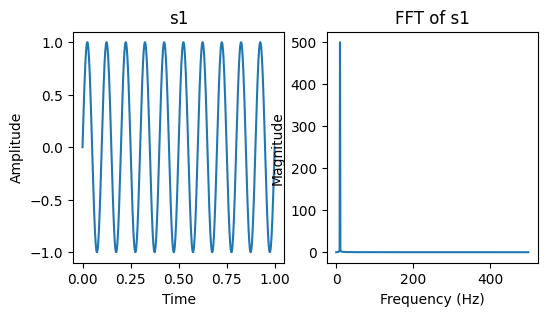

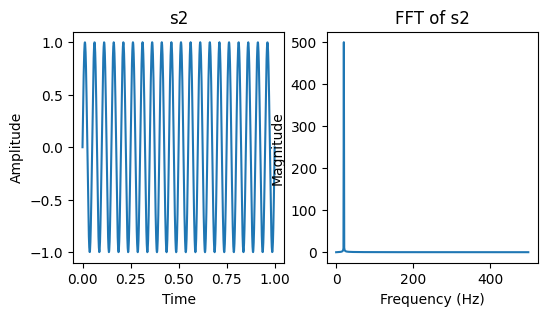

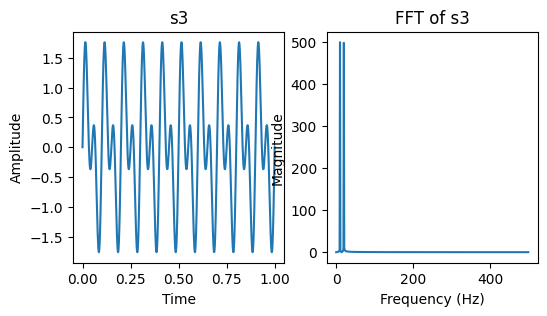

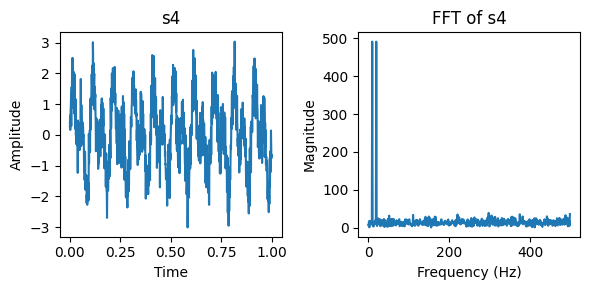

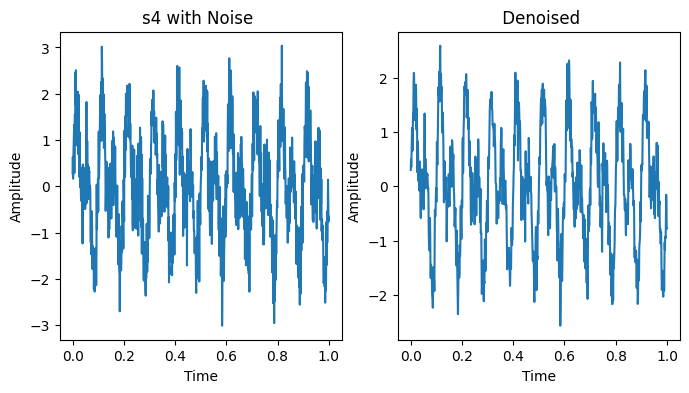

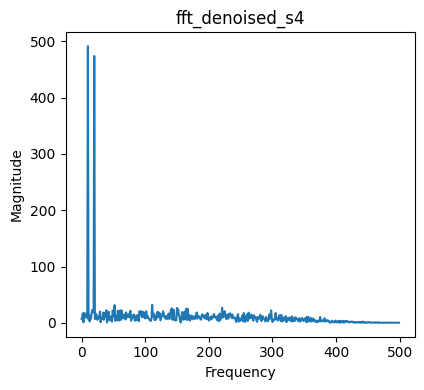

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define the signals
t = np.linspace(0, 1, 1000)
s1 = np.sin(2 * np.pi * 10 * t)  # Signal 1
s2 = np.sin(2 * np.pi * 20 * t)  # Signal 2
s3 = s1 + s2  # Combined signal
noise = np.random.normal(0, 0.5, len(t))  # Random noise
s4 = s3 + noise  # Signal with noise

# Compute the FFT of the signals
fft_s1 = np.fft.fft(s1)
fft_s2 = np.fft.fft(s2)
fft_s3 = np.fft.fft(s3)
fft_s4 = np.fft.fft(s4)

positive_freqs = np.fft.fftfreq(len(t), t[1] - t[0])[:len(t)//2]

fft_s1_positive = fft_s1[:len(t)//2]
fft_s2_positive = fft_s2[:len(t)//2]
fft_s3_positive = fft_s3[:len(t)//2]
fft_s4_positive = fft_s4[:len(t)//2]

# Plot the time domain signals
plt.figure(figsize=(6, 3))

# Plot s1
plt.subplot(121)
plt.plot(t, s1)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('s1')

# Plot FFT of s1
plt.subplot(122)
plt.plot(positive_freqs, np.abs(fft_s1_positive))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of s1')

# Plot the time domain signals
plt.figure(figsize=(6, 3))

# Plot s2
plt.subplot(121)
plt.plot(t, s2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('s2')

# Plot FFT of s2
plt.subplot(122)
plt.plot(positive_freqs, np.abs(fft_s2_positive))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of s2')

# Plot the time domain signals
plt.figure(figsize=(6, 3))

# Plot s3
plt.subplot(121)
plt.plot(t, s3)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('s3')

# Plot FFT of s3
plt.subplot(122)
plt.plot(positive_freqs, np.abs(fft_s3_positive))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of s3')

# Plot the time domain signals
plt.figure(figsize=(6, 3))

# Plot s3
plt.subplot(121)
plt.plot(t, s4)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('s4')

# Plot FFT of s3
plt.subplot(122)
plt.plot(positive_freqs, np.abs(fft_s4_positive))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of s4')

plt.tight_layout()
plt.show()

# Denoise the signal using a Chebyshev Type II filter
order = 5  # Filter order
ripple = 0.1  # Maximum ripple allowed in the stopband (in dB)
cutoff_freq = 15  # Cutoff frequency for the filter

# Design the filter
b, a = signal.cheby2(order, ripple, cutoff_freq, fs=1 / (t[1] - t[0]), output='ba')

# Apply the filter to remove noise from s4
denoised_s4 = signal.filtfilt(b, a, s4)
fft_denoised_s4 = np.fft.fft(denoised_s4)
denoised_s4_positive=fft_denoised_s4[:len(t)//2]
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.plot(t, s4, label='Original with Noise')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('s4 with Noise ')


plt.subplot(122)

plt.plot(t, denoised_s4, label='Denoised')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title(' Denoised')


plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.plot(np.abs(denoised_s4_positive))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('fft_denoised_s4')


plt.tight_layout()
plt.show()

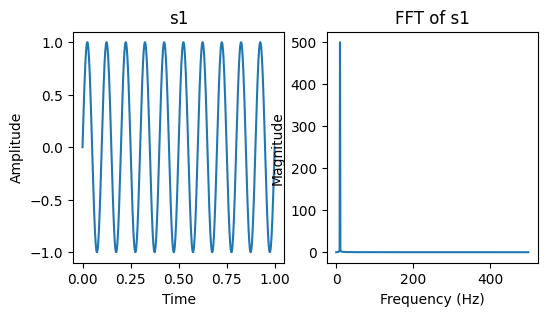

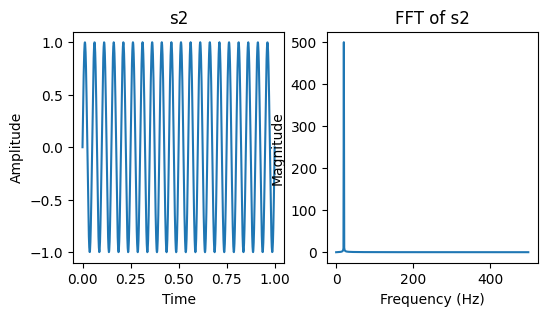

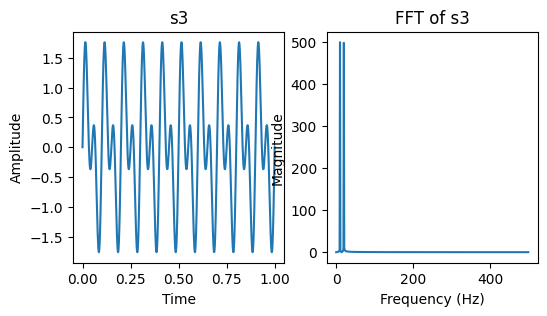

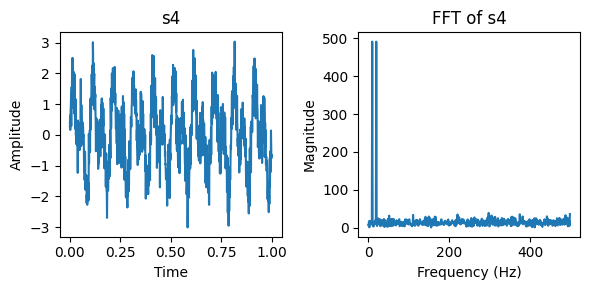

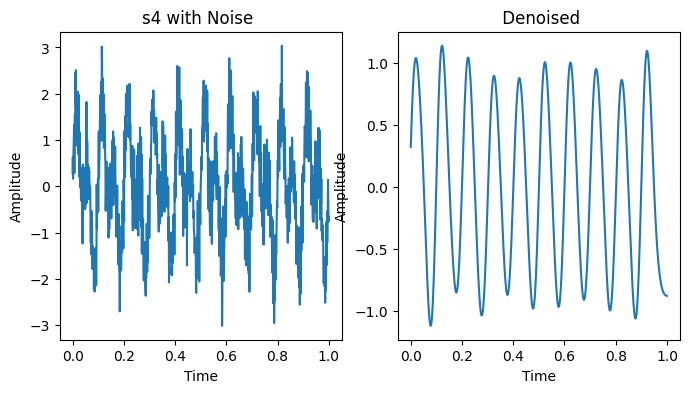

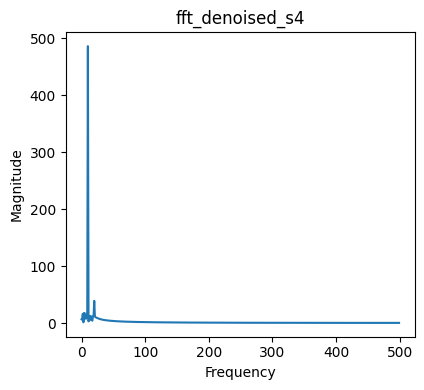

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define the signals
t = np.linspace(0, 1, 1000)
s1 = np.sin(2 * np.pi * 10 * t)  # Signal 1
s2 = np.sin(2 * np.pi * 20 * t)  # Signal 2
s3 = s1 + s2  # Combined signal
noise = np.random.normal(0, 0.5, len(t))  # Random noise
s4 = s3 + noise  # Signal with noise

# Compute the FFT of the signals
fft_s1 = np.fft.fft(s1)
fft_s2 = np.fft.fft(s2)
fft_s3 = np.fft.fft(s3)
fft_s4 = np.fft.fft(s4)

positive_freqs = np.fft.fftfreq(len(t), t[1] - t[0])[:len(t)//2]

fft_s1_positive = fft_s1[:len(t)//2]
fft_s2_positive = fft_s2[:len(t)//2]
fft_s3_positive = fft_s3[:len(t)//2]
fft_s4_positive = fft_s4[:len(t)//2]

# Plot the time domain signals
plt.figure(figsize=(6, 3))

# Plot s1
plt.subplot(121)
plt.plot(t, s1)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('s1')

# Plot FFT of s1
plt.subplot(122)
plt.plot(positive_freqs, np.abs(fft_s1_positive))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of s1')

# Plot the time domain signals
plt.figure(figsize=(6, 3))

# Plot s2
plt.subplot(121)
plt.plot(t, s2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('s2')

# Plot FFT of s2
plt.subplot(122)
plt.plot(positive_freqs, np.abs(fft_s2_positive))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of s2')

# Plot the time domain signals
plt.figure(figsize=(6, 3))

# Plot s3
plt.subplot(121)
plt.plot(t, s3)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('s3')

# Plot FFT of s3
plt.subplot(122)
plt.plot(positive_freqs, np.abs(fft_s3_positive))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of s3')

# Plot the time domain signals
plt.figure(figsize=(6, 3))

# Plot s3
plt.subplot(121)
plt.plot(t, s4)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('s4')

# Plot FFT of s3
plt.subplot(122)
plt.plot(positive_freqs, np.abs(fft_s4_positive))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of s4')

plt.tight_layout()
plt.show()

# Denoise the signal using a Chebyshev Type II filter
order = 5  # Filter order
ripple = 0.1  # Maximum ripple allowed in the stopband (in dB)
cutoff_freq = 15  # Cutoff frequency for the filter

# Design the filter
b, a = signal.cheby1(order, ripple, cutoff_freq, fs=1 / (t[1] - t[0]), output='ba')

# Apply the filter to remove noise from s4
denoised_s4 = signal.filtfilt(b, a, s4)
fft_denoised_s4 = np.fft.fft(denoised_s4)
denoised_s4_positive=fft_denoised_s4[:len(t)//2]
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.plot(t, s4, label='Original with Noise')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('s4 with Noise ')


plt.subplot(122)

plt.plot(t, denoised_s4, label='Denoised')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title(' Denoised')


plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.plot(np.abs(denoised_s4_positive))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('fft_denoised_s4')


plt.tight_layout()
plt.show()